**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

**Business Goal**

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [94]:
###Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

**Documents shared for reference**

https://drive.google.com/drive/folders/148RdWgO5t9I7SjETraMUgSZCO0LfyoAd?usp=drive_link


**Data Readiness**
- importing data from csv file.
- round off floating values.
- remove unwanted variables.

In [95]:
##Import Data for Analysis
bike = pd.read_csv("day.csv")

##round off decimal to two places.
bike['temp']=bike['temp'].round(2)
bike['atemp']=bike['atemp'].round(2)
bike['windspeed']=bike['windspeed'].round(2)
bike['hum']=bike['hum'].round(2)
###removing unwanted variables.
bike=bike.drop(['registered','casual','dteday','instant'],axis=1)
bike.head()



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


**Data Exploration**

In [96]:
##Checking rows and columns count
bike.shape

(730, 12)

In [97]:
###There are non NULL values. No NUll values We are good. !!
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [98]:
##checking for mean and median values for numerical features
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319329,23.726384,62.765082,12.763699,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506827,8.150247,14.237634,5.195640,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.420000,3.950000,0.000000,1.500000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.810000,16.892500,52.000000,9.040000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465000,24.370000,62.625000,12.130000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.882500,30.445000,72.990000,15.627500,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.330000,42.040000,97.250000,34.000000,8714.000000


**Pairplot to check relationship between variables.**

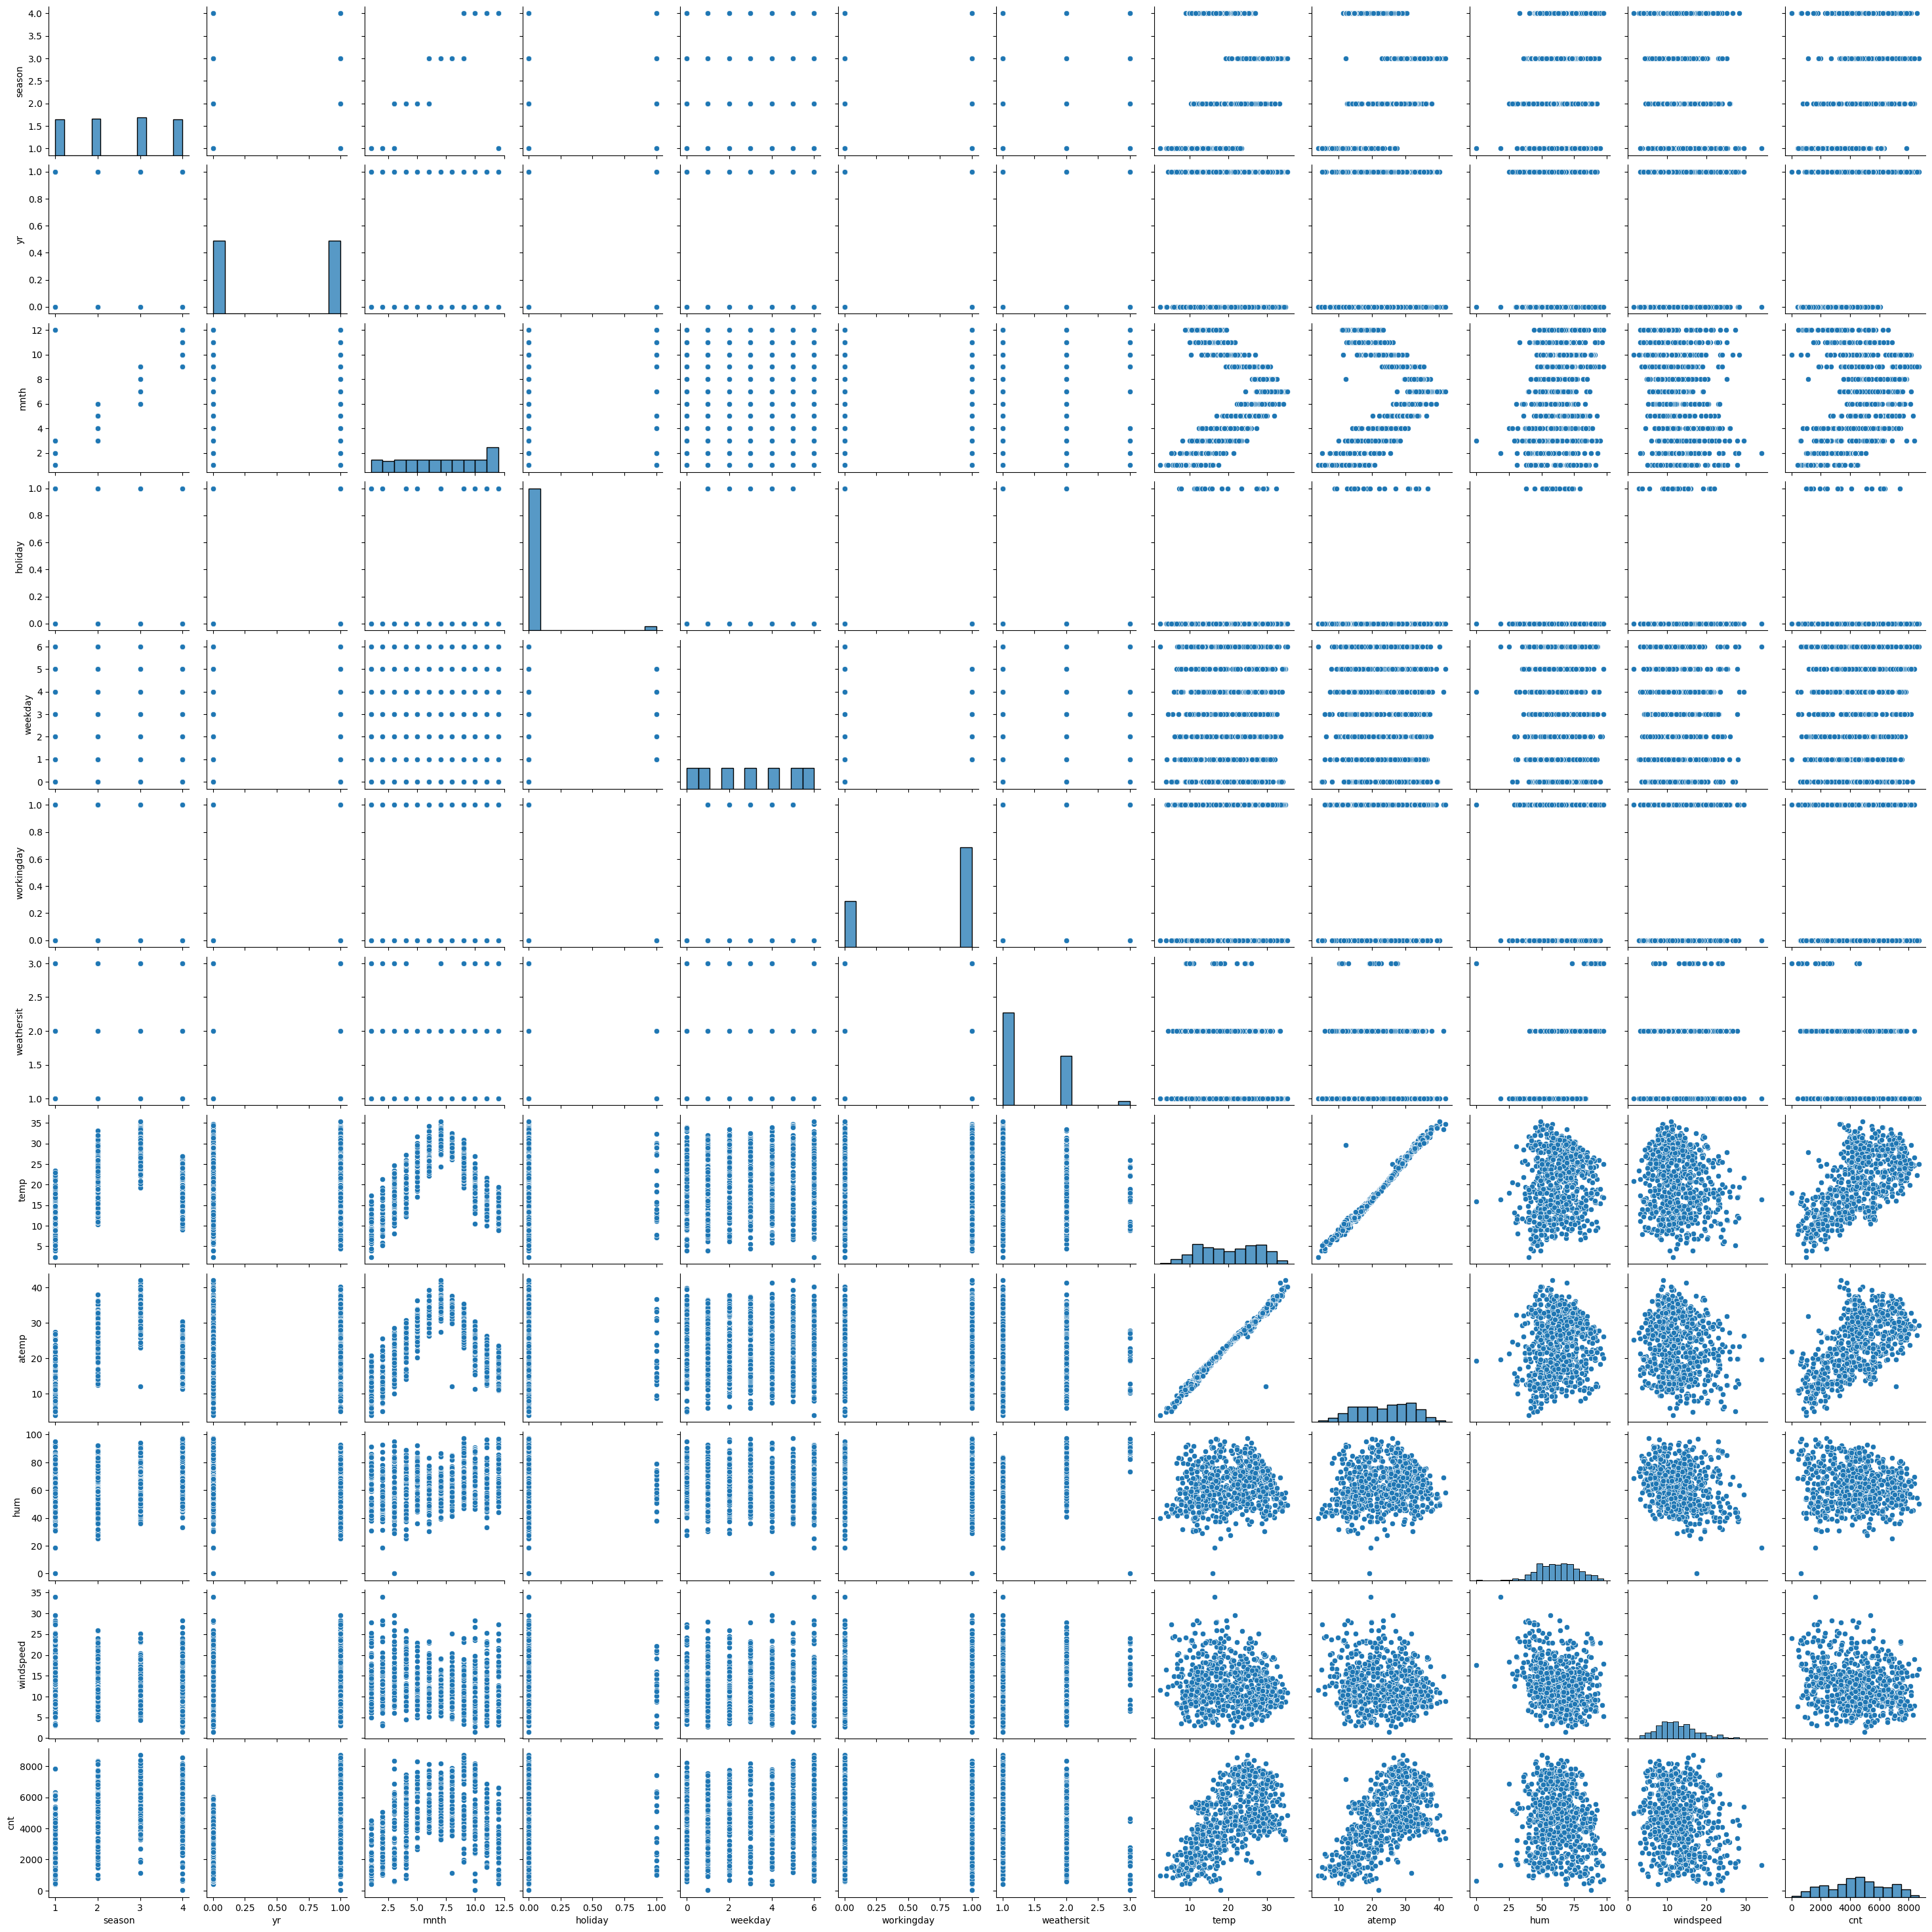

In [99]:
sns.pairplot(bike)
plt.show()

**Observations from Pariplot**

- Variables Temp and Atemp is linear/colinear
- Variable Cnt increase with increase in temp,atemp variables.
- Less bookings seen with Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Less booking seen when holiday is 1
- Booking count seen increase in 2019 when compared to 2018.


**Bivariate Analysis on Categorical Variables using BOXPLOT**



<Axes: xlabel='weathersit', ylabel='cnt'>

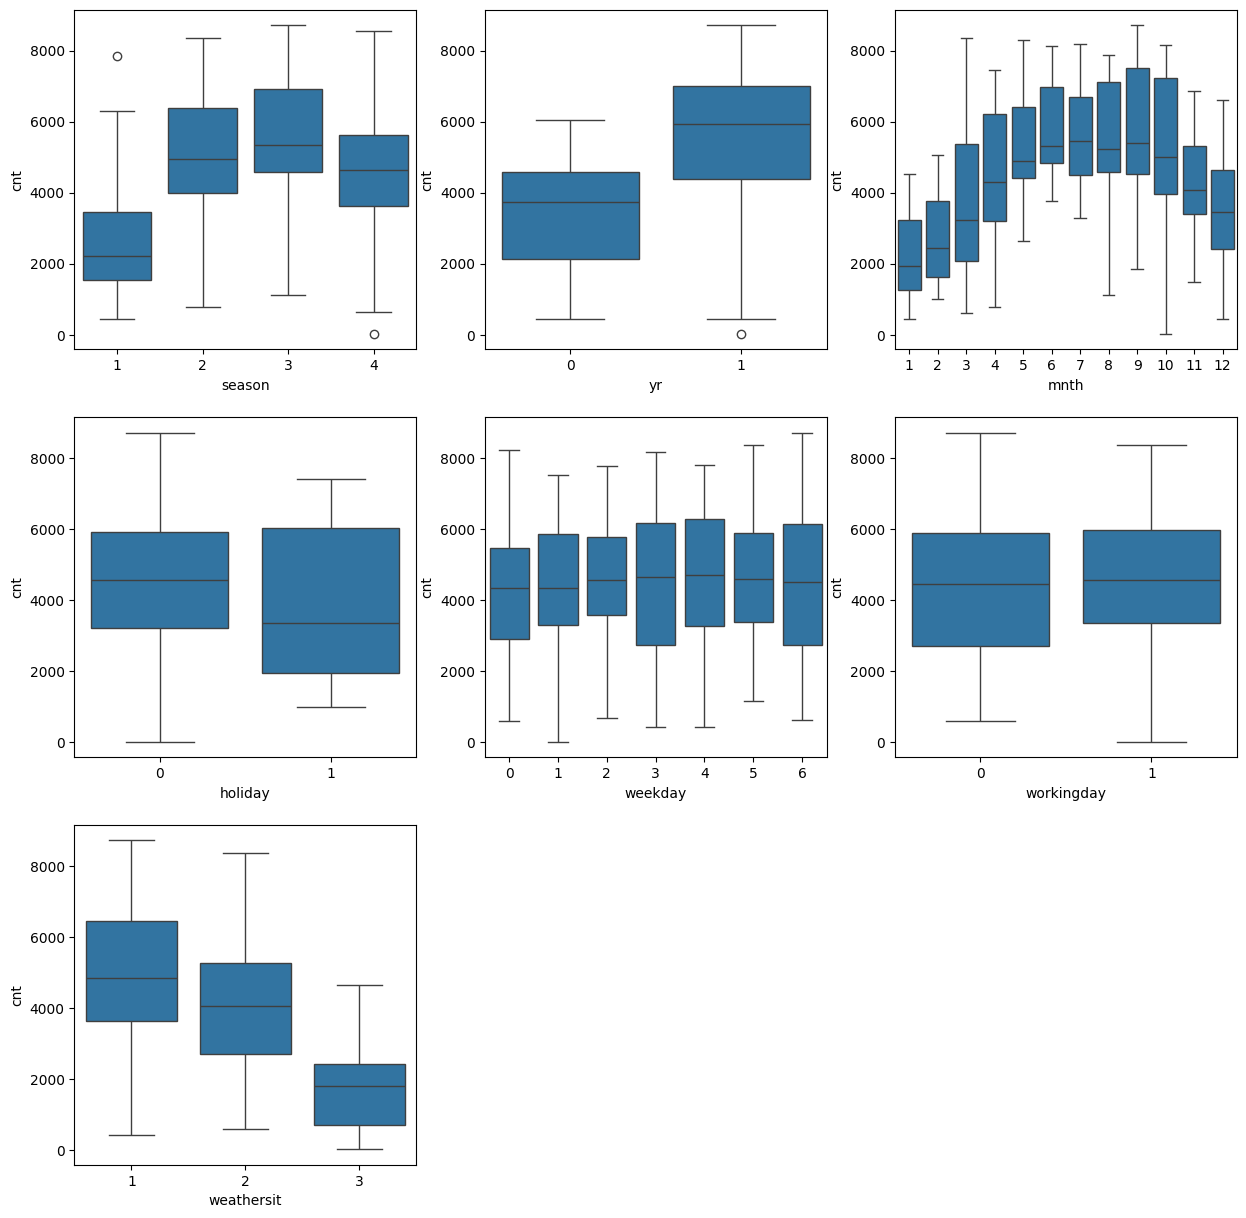

In [100]:

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
#plt.figure(figsize=(15,15))
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)
#plt.figure(figsize=(10,8))
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)
#plt.figure(figsize=(10,8))
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
#plt.figure(figsize=(10,8))
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
#plt.figure(figsize=(10,8))
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike)
#plt.figure(figsize=(10,8))
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike)

**Bivariate Analysis Observations**
- 2019 increase in number of bookings cnt compared for 2018.
- Less booking seen with Weathersit-3: Light Snow, Light Rain +
  Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
  Highest bookings seen in Weathersit_1 ie. Clear, Few clouds, Partly cloudy, Partly cloudy
- Gradual increase in bookings seen in 2nd and 3rd quarter for both years.
- HIghest bookings seen when there is Holiday(0) with median lying 4800.


**Univariate Analysis on numeric variables**

Text(0, 0.5, 'Frequency')

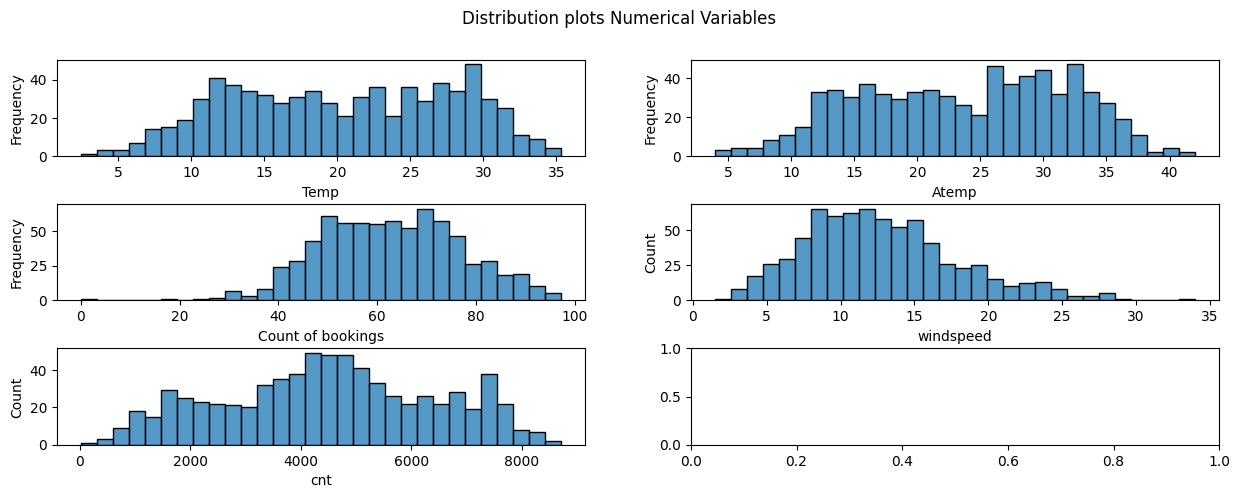

In [101]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 5))
fig.suptitle('Distribution plots Numerical Variables')
fig.subplots_adjust(hspace=0.5)

# Plot 1: Frequency distribution of 'Temp'
sns.histplot(bike['temp'], kde=False, ax=axs[0,0], bins=30)
axs[0,0].set_xlabel('Temp')
axs[0,0].set_ylabel('Frequency')

# Plot 2: Frequency distribution of 'Atemp'
sns.histplot(bike['atemp'], kde=False, ax=axs[0,1], bins=30)
axs[0,1].set_xlabel('Atemp')
axs[0,1].set_ylabel('Frequency')

# Plot 3: Frequency distribution of 'Humidity'
sns.histplot(bike['hum'], kde=False, ax=axs[1,0], bins=30)
axs[1,0].set_xlabel('Humidity')
axs[1,0].set_ylabel('Frequency')

# Plot 4: Frequency distribution of 'Windspeed'
sns.histplot(bike['windspeed'], kde=False, ax=axs[1,1], bins=30)
axs[1,0].set_xlabel('Windspeed')
axs[1,0].set_ylabel('Frequency')

# Plot 5: Frequency distribution of 'COunt'
sns.histplot(bike['cnt'], kde=False, ax=axs[2,0], bins=30)
axs[1,0].set_xlabel('Count of bookings')
axs[1,0].set_ylabel('Frequency')

**Observations on Distribution of Numerical Variables**
- temp and atemp have same distribution and they colinear. We can drop one of these variables in coming analysis.
- More booking are seein when windspeed in 7 to 15
- Frequency distribution of cnt shows avg booking number around 3000.


**We will create dummy variables for categorical variables**


In [102]:

##DUMMY CREATION
status1=pd.get_dummies(bike['season'],drop_first=True,dtype=int)
status1.rename(columns={2: 'summer', 3:'fall',4:'winter'}, inplace=True)
status1.head()
bike=pd.concat([bike,status1],axis=1)
bike.drop('season',axis=1,inplace=True)

status2=pd.get_dummies(bike['mnth'],drop_first=True,dtype=int)
status2.rename(columns={2: 'Feb', 3:'Mar',4:'April',5: 'May', 6:'June',7:'July',8:'Aug', 9:'Sept',10:'Oct',11:'Nov', 12:'Dec'}, inplace=True)
status2.head()
bike=pd.concat([bike,status2],axis=1)
bike.drop('mnth',axis=1,inplace=True)

status3=pd.get_dummies(bike['weekday'],drop_first=True,dtype=int)
status3.rename(columns={1: 'Tue', 2:'Wed',3:'Thurs',4: 'Fri', 5:'Sat',6:'Sun'}, inplace=True)
status3.head()
bike=pd.concat([bike,status3],axis=1)
bike.drop('weekday',axis=1,inplace=True)

status4=pd.get_dummies(bike['weathersit'],drop_first=True,dtype=int)
status4.rename(columns={2: 'weathersit_2', 3:'weathersit_3',4:'weathersit_4'}, inplace=True)
status4.head()
bike=pd.concat([bike,status4],axis=1)
bike.drop('weathersit',axis=1,inplace=True)
bike.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Tue,Wed,Thurs,Fri,Sat,Sun,weathersit_2,weathersit_3
0,0,0,0,14.11,18.18,80.58,10.75,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.90,17.69,69.61,16.65,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.05,9.47,43.73,16.64,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


**Final list of columns for analysis**

In [103]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'Feb', 'Mar', 'April', 'May', 'June',
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Tue', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'weathersit_2', 'weathersit_3'],
      dtype='object')

**Splitting data into Train and test split**
- 70:30 ratio followed.

In [104]:
#splitting train and test data
bike_train,bike_test = train_test_split(bike,train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


 **Scaling train data using MinMax Scaler to fit data for analysis**

In [105]:
scaler=MinMaxScaler()
##create list of numerical variables
num_vars=['temp','atemp','hum','windspeed']
##fit scaler.fit
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Tue,Wed,Thurs,Fri,Sat,Sun,weathersit_2,weathersit_3
576,1,0,1,0.815254,0.766343,0.725680,0.264678,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442419,0.438960,0.640148,0.255374,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245214,0.200315,0.498042,0.663138,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395624,0.391966,0.504534,0.188643,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345792,0.318981,0.751855,0.381136,1683,1,0,...,0,0,0,0,0,0,1,0,1,0


**There are two methods we can follow for analysing train data**
- Step by step addition of requried features.
- One by one removal of unwanted features from set.

**Drawing heatmap to find Co-relation for crosscheck**

<Axes: >

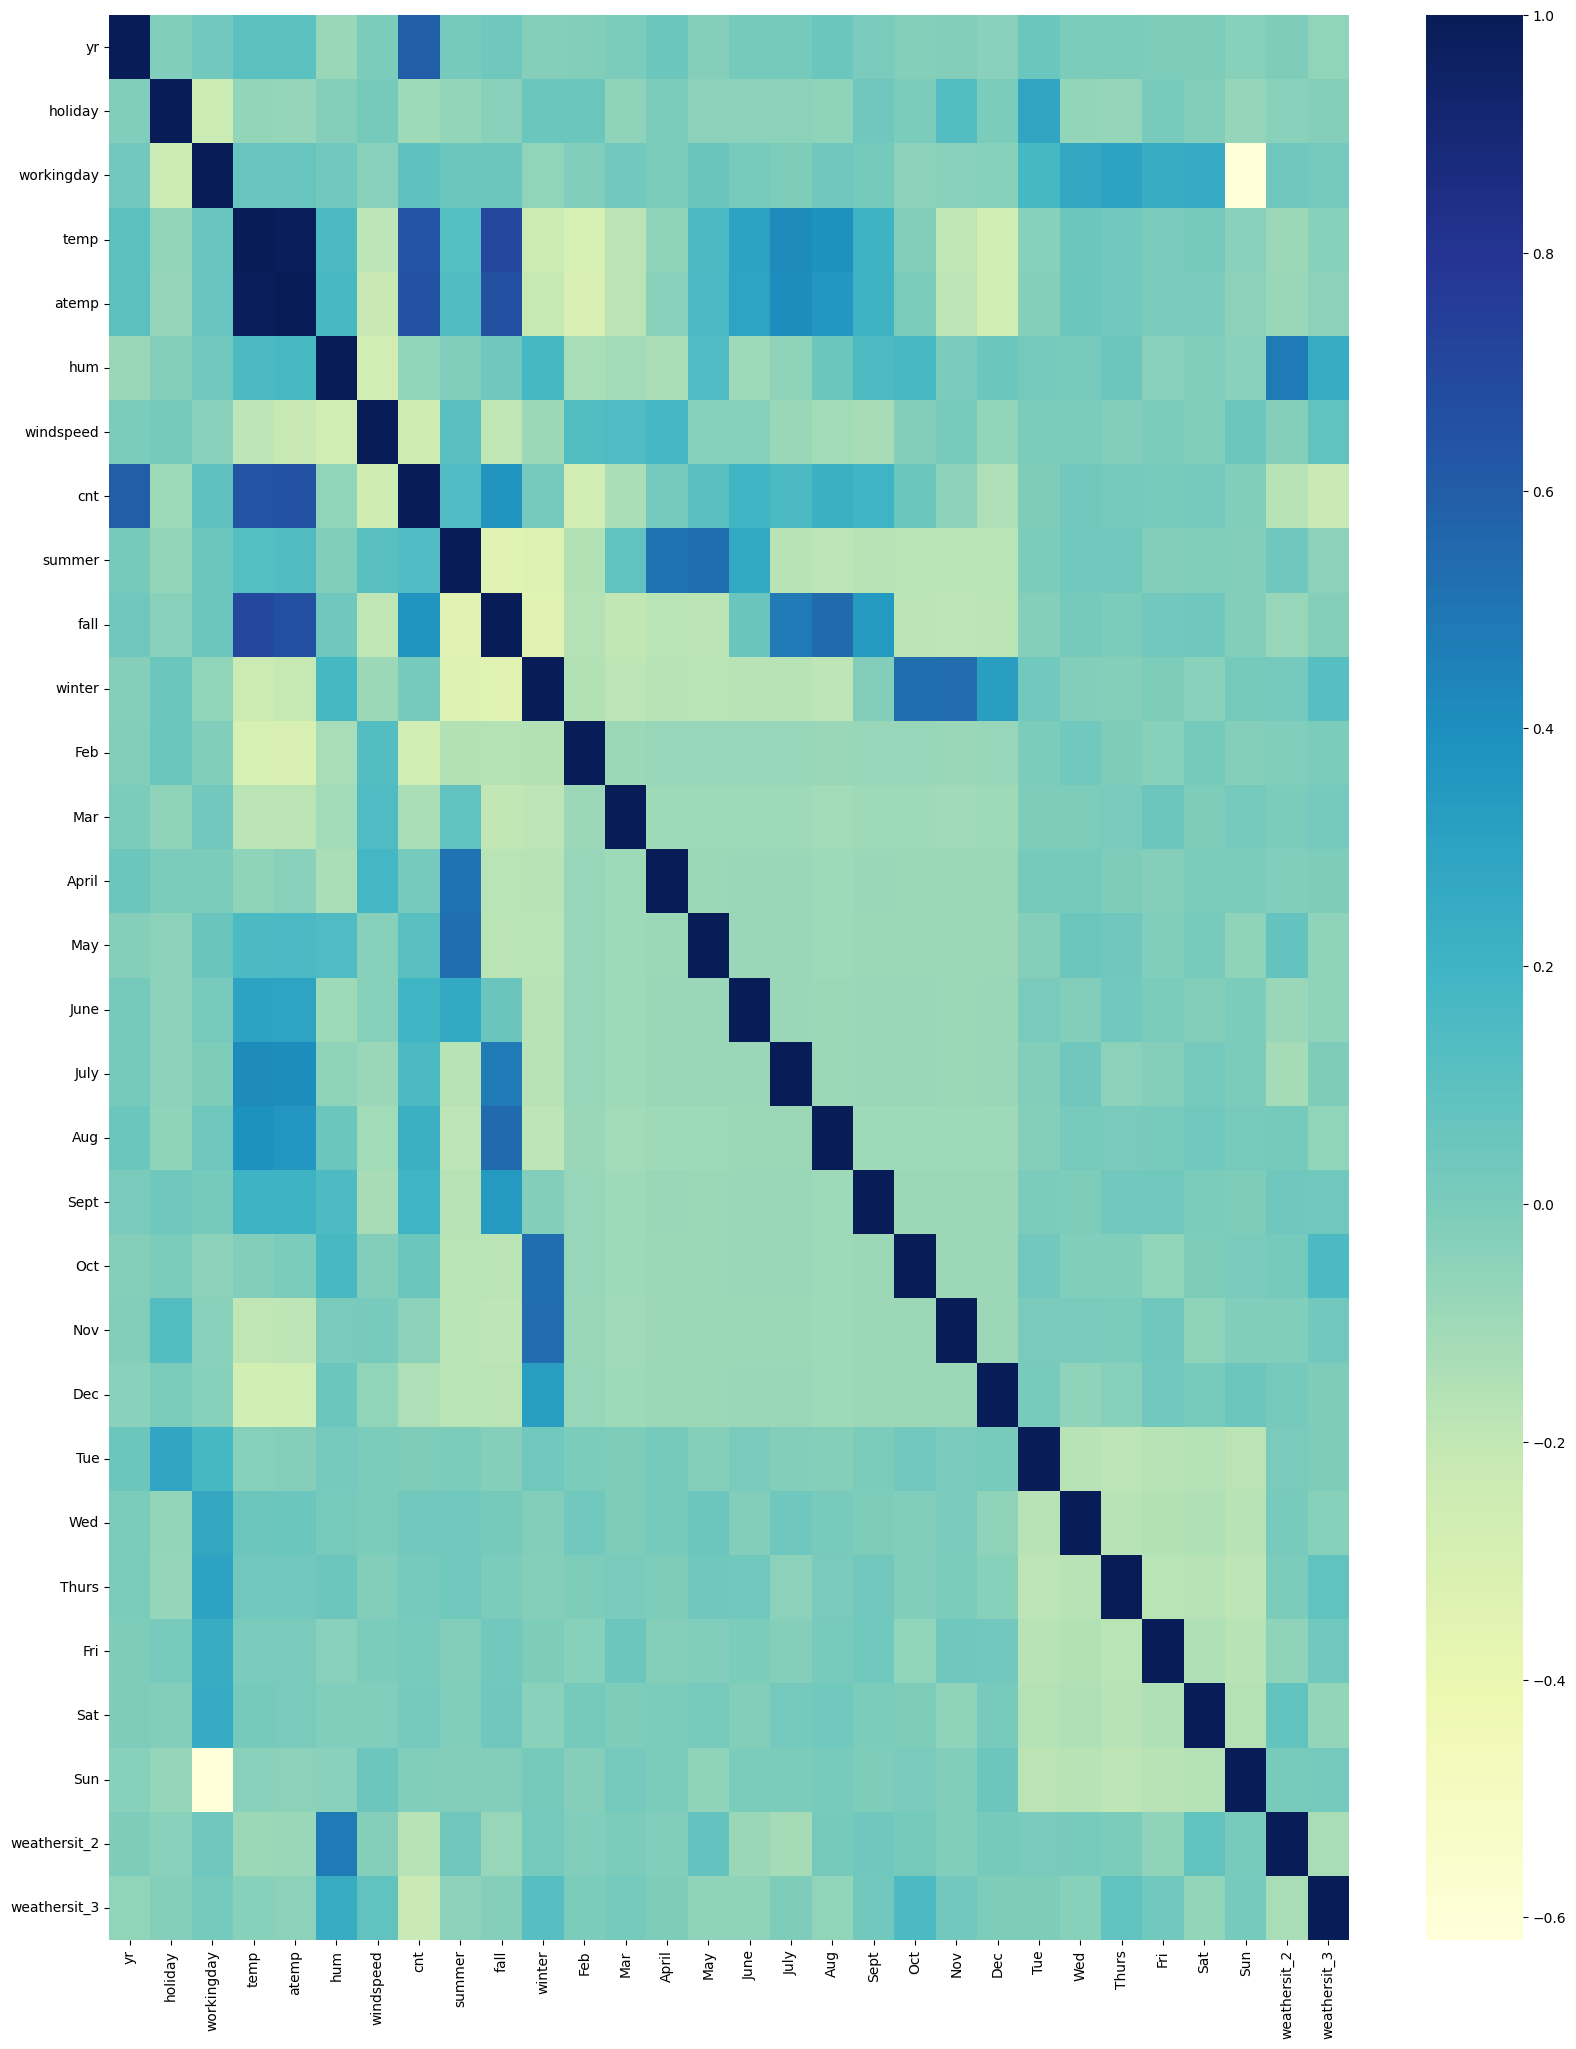

In [106]:
plt.figure(figsize=(20,25))
sns.heatmap(bike_train.corr(),cmap='YlGnBu')

**Generating X_train and y_train for analysis.**

In [107]:
y_train=bike_train.pop('cnt')
X_train=bike_train

**Adding Constants , Following Top Down Approach**

In [108]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,...,Nov,Dec,Tue,Wed,Thurs,Fri,Sat,Sun,weathersit_2,weathersit_3
576,1.0,1,0,1,0.815254,0.766343,0.725680,0.264678,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442419,0.438960,0.640148,0.255374,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245214,0.200315,0.498042,0.663138,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395624,0.391966,0.504534,0.188643,1,0,...,0,0,0,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345792,0.318981,0.751855,0.381136,1,0,...,0,0,0,0,0,0,1,0,1,0


**Generate Linear Regression Model and Analyse Data**

In [109]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [110]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.36
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.85e-180
Time:                        16:56:46   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1550.4262    264.751      5.856      0.000    1030.214    2070.638
yr            2021.2008     70.199     28.792      0.000    1883.266    2159.136
holiday       -361.8334    205.845     -1.758      0.079    -766.299      42.632
workingday     380.2598     81.513      4.665      0.000     220.095     540.425
temp          3368.2856   1237.016      2.723      0.007     937.663    5798.908
atemp          517.2170   1203.432      0.430      0.668   -1847.416    2881.850
hum          -1321.3400    335.560     -3.938      0.000   -1980.685    -661.995
windspeed    -1596.3476    229.299     -6.962      0.000   -2046.898   -1145.797
summer         762.4866    205.385      3.712      0.000     358.924    1166.049
fall           394.2304    260.932      1.511      0.131    -118.477     906.938
winter        1324.9584    225.864      5.866      0.000     881.156    1768.761
Feb            267.2940    179.494      1.489      0.137     -85.395     619.983
Mar            561.9187    194.588      2.888      0.004     179.571     944.266
April          548.3860    292.213      1.877      0.061     -25.785    1122.557
May            770.5261    314.911      2.447      0.015     151.755    1389.297
June           601.0035    338.015      1.778      0.076     -63.164    1265.171
July           264.9259    381.800      0.694      0.488    -485.275    1015.127
Aug            742.3429    363.988      2.039      0.042      27.140    1457.546
Sept          1302.5794    325.102      4.007      0.000     663.784    1941.375
Oct            615.3796    300.039      2.051      0.041      25.831    1204.928
Nov            202.2144    285.722      0.708      0.479    -359.203     763.632
Dec            163.3601    230.571      0.709      0.479    -289.691     616.411
Tue            -87.4789     84.656     -1.033      0.302    -253.820      78.862
Wed            -59.6880     97.076     -0.615      0.539    -250.433     131.057
Thurs           49.2454     91.517      0.538      0.591    -130.578     229.068
Fri             15.8986     95.080      0.167      0.867    -170.926     202.723
Sat            100.4492     97.637      1.029      0.304     -91.399     292.297
Sun            471.2362    126.393      3.728      0.000     222.886     719.586
weathersit_2  -517.3740     90.745     -5.701      0.000    -695.680    -339.068
weathersit_3 -2216.1325    230.130     -9.630      0.000   -2668.317   -1763.948
==============================================================================
Omnibus:                       84.499   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.700
Skew:                          -0.805   Prob(JB):                     1.09e-51
Kurtosis:                       5.907   Cond. No.                     8.44e+15
===============

**Observations**
- R2 squared found to be covering 85% of data.
- Increase in P value seen for many features. We will compare it with Variance Inflation Factor and remove multicollinear features.
- Priority for removal
  - HIgh P value, HIgh VIF - Priority 1,
  - HIgh P value, low VIF - Priority 2,
  - Low P value , HIgh VIF - Priority 2.

In [111]:

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

        Features     VIF
24           Fri     inf
2     workingday     inf
23         Thurs     inf
22           Wed     inf
21           Tue     inf
25           Sat     inf
1        holiday     inf
3           temp  446.73
4          atemp  383.39
5            hum   20.81
8           fall   15.37
16           Aug   10.92
9         winter   10.83
15          July    9.54
7         summer    8.94
14          June    7.43
17          Sept    7.29
13           May    7.16
18           Oct    6.50
19           Nov    5.98
12         April    5.64
6      windspeed    4.71
20           Dec    3.78
11           Mar    3.05
27  weathersit_2    2.21
0             yr    2.09
26           Sun    1.93
10           Feb    1.71
28  weathersit_3    1.23


**Removing variables one by one based on above mentioned rule and analysing if there is improvement in R2 and reduction in p value and VIF less than 5**

1. Removing Fri feature.

In [112]:
###drop atemp, since its collinear with temp.
X_train=X_train.drop('Fri',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.36
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.85e-180
Time:                        16:56:46   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1550.4262    264.751      5.856   

**Dropping feature Thurs(p-value 0.796)**

In [113]:
###drop Fri, since its collinear with temp.
X_train=X_train.drop('Thurs',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.87e-181
Time:                        16:56:46   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     482   BIC:                             8372.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1548.7660    264.419      5.857   

In [114]:
###drop atemp, since its collinear with temp.
X_train=X_train.drop('atemp',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.00e-182
Time:                        16:56:46   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     483   BIC:                             8366.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1552.7485    264.026      5.881   

In [115]:
###drop July, since its collinear with temp.
X_train=X_train.drop('Sat',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.23e-183
Time:                        16:56:46   Log-Likelihood:                -4099.0
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     484   BIC:                             8360.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1555.8649    263.767      5.899   

In [116]:
###drop July, p-value is 0.486 and vif is 9.5.
X_train=X_train.drop('July',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.77e-184
Time:                        16:56:47   Log-Likelihood:                -4099.2
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     485   BIC:                             8354.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1567.2536    263.122      5.956   

In [117]:
###drop Nov p-value is 0.687 is and VIF is 4.46.
X_train=X_train.drop('Nov',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.66e-185
Time:                        16:56:47   Log-Likelihood:                -4099.3
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     486   BIC:                             8348.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1577.2851    261.721      6.027   

In [118]:
##Dropping Dec with p-value is 0.8
X_train=X_train.drop('Dec',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.28e-186
Time:                        16:56:47   Log-Likelihood:                -4099.3
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     487   BIC:                             8342.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1582.2976    260.476      6.075   

In [119]:
###drop Wed, since its p-value is 0.296.
X_train=X_train.drop('Wed',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.82e-187
Time:                        16:56:48   Log-Likelihood:                -4099.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     488   BIC:                             8337.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1595.2074    260.210      6.130   

In [120]:
###drop Tue, since its collinear with temp.
X_train=X_train.drop('Tue',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          7.38e-188
Time:                        16:56:48   Log-Likelihood:                -4100.5
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     489   BIC:                             8332.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1604.3576    260.140      6.167   

In [121]:
##drop Feb, since p-value is 0.21.
X_train=X_train.drop('Feb',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.31e-188
Time:                        16:56:48   Log-Likelihood:                -4101.4
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     490   BIC:                             8327.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1682.9409    252.655      6.661   

In [122]:
###drop April, since p-value is 0.1.
X_train=X_train.drop('April',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.90e-189
Time:                        16:56:48   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     491   BIC:                             8324.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1715.5239    252.294      6.800   

In [123]:
###drop June, since p-value 0.26.
X_train=X_train.drop('June',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.63e-190
Time:                        16:56:48   Log-Likelihood:                -4103.4
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     492   BIC:                             8319.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1711.8362    252.342      6.784   

In [124]:
###drop May, since p-value 0.110.
X_train=X_train.drop('May',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.48e-190
Time:                        16:56:49   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     493   BIC:                             8315.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1666.3357    251.106      6.636   

In [125]:
###drop Fall, since p-value 0.09.
X_train=X_train.drop('fall',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.24e-191
Time:                        16:56:49   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1671.1877    251.539      6.644   

In [126]:
###drop Mar, since p-value 0.139.
X_train=X_train.drop('Mar',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          8.85e-192
Time:                        16:56:49   Log-Likelihood:                -4107.3
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     495   BIC:                             8308.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1714.8271    250.116      6.856   

In [127]:
###drop hum, All P values are below 0.05 . So will drop based on VIF , Humidity as 16.
X_train=X_train.drop('hum',axis=1)
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.01e-188
Time:                        16:56:49   Log-Likelihood:                -4118.0
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     496   BIC:                             8323.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          836.6935    165.862      5.045   

 **OLS Regression Results**                          
===========================================================================

Dep. Variable:                    cnt   **R-squared:   0.841**

Model:                            OLS   **Adj. R-squared:   0.837**

Method:                 Least Squares   F-statistic:  201.7

Date:                Tue, 24 Sep 2024   **Prob (F-statistic):  2.01e-188**

Time:                        12:39:43   Log-Likelihood:   -4118.0

No. Observations:                 510   AIC:     8264.

Df Residuals:                     496   BIC:     8323.

Df Model:                      13                                         
Covariance Type:        nonrobust                                         

**Residual Analysis and Predictions**

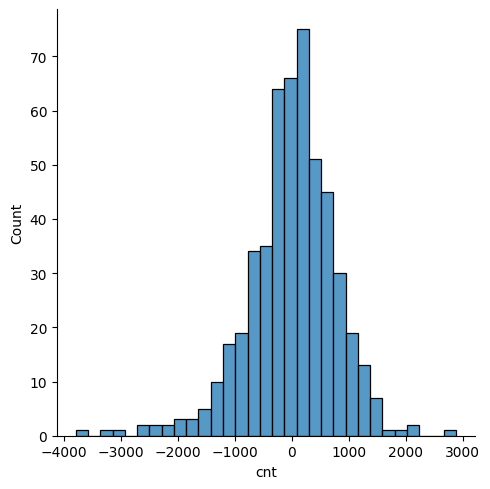

In [128]:
y_train_pred=lr_model.predict()
residual = y_train - y_train_pred
sns.displot(residual)

**Comparison with TEST set**



Scaling numerical features from test set. since it will be real world data we dont try to fit to model we will just transform them only.

In [129]:

num_vars_test=['temp','atemp','hum','windspeed']
bike_test[num_vars_test]=scaler.transform(bike_test[num_vars_test])

bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Tue,Wed,Thurs,Fri,Sat,Sun,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558748,0.532961,0.638234,0.313393,4560.559091,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233160,0.217401,0.148698,0.159547,1904.968544,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046794,0.025991,0.261954,-0.042669,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355363,0.344907,0.529189,0.198909,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558189,0.544762,0.625618,0.300289,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756077,0.713376,0.743843,0.402952,5913.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984503,0.981097,1.002164,0.807507,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
y_test=bike_test.pop('cnt')
X_test=bike_test

In [131]:
X_test_sm=sm.add_constant(X_test)
X_test_sm=X_test_sm.drop(['hum','Mar','fall','May','June','April','Feb','Tue','Wed','Dec','Nov','July','Sat','atemp','Thurs','Fri'],axis=1)

In [132]:
##Predict
y_test_pred=lr_model.predict(X_test_sm)
##Evaluate


**r2_score calculations...**

- **R2 square of Train model = 84.1%**
- **R2_score of Test model = 80.3%**




In [133]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8033785445795495

**Final Model build**

cnt = sun*502.5 + oct*298.1 + yr*2025.8 + holiday*-470.38 + workingday*411.19 + temp*4439 + windspeed*-1330.3 + summer*885.75 + winter*1100.9 + Aug*468.8 + sept*1029.96

**Feature selection using Automted Recursive feature elimination**

In [134]:
bike_rfe = pd.read_csv("day.csv")

##round off decimal to two places.
bike_rfe['temp']=bike_rfe['temp'].round(2)
bike_rfe['atemp']=bike_rfe['atemp'].round(2)
bike_rfe['windspeed']=bike_rfe['windspeed'].round(2)
bike_rfe['hum']=bike_rfe['hum'].round(2)
bike_rfe=bike_rfe.drop(['registered','casual','dteday','instant'],axis=1)

##DUMMY CREATION pending...
status1_rfe=pd.get_dummies(bike_rfe['season'],drop_first=True,dtype=int)
status1_rfe.rename(columns={2: 'summer', 3:'fall',4:'winter'}, inplace=True)
status1_rfe.head()
bike_rfe=pd.concat([bike_rfe,status1],axis=1)
bike_rfe.drop('season',axis=1,inplace=True)

status2_rfe=pd.get_dummies(bike_rfe['mnth'],drop_first=True,dtype=int)
status2_rfe.rename(columns={2: 'Feb', 3:'Mar',4:'April',5: 'May', 6:'June',7:'July',8:'Aug', 9:'Sept',10:'Oct',11:'Nov', 12:'Dec'}, inplace=True)
status2_rfe.head()
bike_rfe=pd.concat([bike_rfe,status2],axis=1)
bike_rfe.drop('mnth',axis=1,inplace=True)

status3_rfe=pd.get_dummies(bike_rfe['weekday'],drop_first=True,dtype=int)
status3_rfe.rename(columns={1: 'Tue', 2:'Wed',3:'Thurs',4: 'Fri', 5:'Sat',6:'Sun'}, inplace=True)
status3_rfe.head()
bike_rfe=pd.concat([bike_rfe,status3],axis=1)
bike_rfe.drop('weekday',axis=1,inplace=True)

status4_rfe=pd.get_dummies(bike_rfe['weathersit'],drop_first=True,dtype=int)
status4_rfe.rename(columns={2: 'weathersit_2', 3:'weathersit_3',4:'weathersit_4'}, inplace=True)
status4_rfe.head()
bike_rfe=pd.concat([bike_rfe,status4],axis=1)
bike_rfe.drop('weathersit',axis=1,inplace=True)
bike_rfe.head()
#splitting train and test data
bike_rfe_train,bike_rfe_test = train_test_split(bike_rfe,train_size=0.7,random_state=100)
print(bike_rfe_train.shape)
print(bike_rfe_test.shape)
scaler=MinMaxScaler()
##create list of numerical variables
num_vars=['temp','atemp','hum','windspeed']
##fit scaler.fit
bike_rfe_train[num_vars]=scaler.fit_transform(bike_rfe_train[num_vars])
bike_rfe_train.head()
y_rfe_train=bike_rfe_train.pop('cnt')
X_rfe_train=bike_rfe_train

lm_rfe = LinearRegression()
lm_rfe.fit(X_rfe_train,y_rfe_train)
rfe = RFE(lm_rfe,step=10)
rfe=rfe.fit(X_rfe_train,y_rfe_train)
list(zip(X_rfe_train.columns,rfe.support_,rfe.ranking_))

(510, 30)
(220, 30)


[('yr', False, 3),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', False, 3),
 ('fall', False, 3),
 ('winter', False, 3),
 ('Feb', False, 3),
 ('Mar', False, 3),
 ('April', True, 1),
 ('May', True, 1),
 ('June', False, 2),
 ('July', True, 1),
 ('Aug', False, 2),
 ('Sept', True, 1),
 ('Oct', True, 1),
 ('Nov', True, 1),
 ('Dec', False, 3),
 ('Tue', False, 2),
 ('Wed', True, 1),
 ('Thurs', False, 2),
 ('Fri', True, 1),
 ('Sat', False, 2),
 ('Sun', True, 1),
 ('weathersit_2', False, 3),
 ('weathersit_3', False, 3)]

In [135]:
X_rfe_train.columns[rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May',
       'July', 'Sept', 'Oct', 'Nov', 'Wed', 'Fri', 'Sun'],
      dtype='object')

In [136]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Aug', 'Sept', 'Oct', 'Sun', 'weathersit_2', 'weathersit_3'],
      dtype='object')

**Build model using Statsmodel for detailed statistics**

In [137]:
##I will use RFE chosen top 10 columns to build and analyse r2
X_rfe_train_stats=X_rfe_train[['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov', 'Wed', 'Fri', 'Sun']]
y_rfe_train_stats=y_train
X_rfe_train_stats_sm=sm.add_constant(X_rfe_train_stats)
lm_rfe_stats=sm.OLS(y_rfe_train_stats,X_rfe_train_stats_sm).fit()
print(lm_rfe_stats.summary())

vif=pd.DataFrame()
vif['Features']=['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov', 'Wed', 'Fri', 'Sun']
vif['VIF']=[variance_inflation_factor(X_rfe_train_stats.values,i) for i in range(X_rfe_train_stats.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     40.25
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.64e-72
Time:                        16:56:50   Log-Likelihood:                -4393.1
No. Observations:                 510   AIC:                             8816.
Df Residuals:                     495   BIC:                             8880.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3781.8875    399.275      9.472      0.0

In [139]:
###drop Wed, P value is 0.556
X_rfe_train_stats=X_rfe_train[['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov','Fri', 'Sun']]
y_rfe_train_stats=y_train
X_rfe_train_stats_sm=sm.add_constant(X_rfe_train_stats)
lr_rfe=sm.OLS(y_rfe_train_stats,X_rfe_train_stats_sm)
lr_rfe_model=lr_rfe.fit()
print(lr_rfe_model.summary())
vif_rfe=pd.DataFrame()
vif_rfe['Features']=['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov','Fri', 'Sun']
vif_rfe['VIF']=[variance_inflation_factor(X_rfe_train_stats.values,i) for i in range(X_rfe_train_stats.shape[1])]
vif_rfe['VIF']=round(vif_rfe['VIF'],2)
vif_rfe=vif_rfe.sort_values(by='VIF',ascending=False)
print(vif_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     43.37
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           2.88e-73
Time:                        16:57:30   Log-Likelihood:                -4393.3
No. Observations:                 510   AIC:                             8815.
Df Residuals:                     496   BIC:                             8874.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3784.8734    398.980      9.486      0.0

In [140]:
###drop Fri, P value is 0.62
X_rfe_train_stats=X_rfe_train[['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov','Sun']]
y_rfe_train_stats=y_train
X_rfe_train_stats_sm=sm.add_constant(X_rfe_train_stats)
lr_rfe=sm.OLS(y_rfe_train_stats,X_rfe_train_stats_sm)
lr_rfe_model=lr_rfe.fit()
print(lr_rfe_model.summary())
vif_rfe=pd.DataFrame()
vif_rfe['Features']=['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov','Sun']
vif_rfe['VIF']=[variance_inflation_factor(X_rfe_train_stats.values,i) for i in range(X_rfe_train_stats.shape[1])]
vif_rfe['VIF']=round(vif_rfe['VIF'],2)
vif_rfe=vif_rfe.sort_values(by='VIF',ascending=False)
print(vif_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     47.04
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           4.63e-74
Time:                        16:58:35   Log-Likelihood:                -4393.4
No. Observations:                 510   AIC:                             8813.
Df Residuals:                     497   BIC:                             8868.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3778.9289    398.497      9.483      0.0

In [142]:
###drop Sun, P value is 0.137
X_rfe_train_stats=X_rfe_train[['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov']]
y_rfe_train_stats=y_train
X_rfe_train_stats_sm=sm.add_constant(X_rfe_train_stats)
lr_rfe=sm.OLS(y_rfe_train_stats,X_rfe_train_stats_sm)
lr_rfe_model=lr_rfe.fit()
print(lr_rfe_model.summary())
vif_rfe=pd.DataFrame()
vif_rfe['Features']=['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov']
vif_rfe['VIF']=[variance_inflation_factor(X_rfe_train_stats.values,i) for i in range(X_rfe_train_stats.shape[1])]
vif_rfe['VIF']=round(vif_rfe['VIF'],2)
vif_rfe=vif_rfe.sort_values(by='VIF',ascending=False)
print(vif_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     50.99
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.88e-74
Time:                        17:01:41   Log-Likelihood:                -4394.5
No. Observations:                 510   AIC:                             8813.
Df Residuals:                     498   BIC:                             8864.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3956.8934    380.633     10.396      0.0

In [143]:
###drop Workingday, P value is 0.226
X_rfe_train_stats=X_rfe_train[['holiday','atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov']]
y_rfe_train_stats=y_train
X_rfe_train_stats_sm=sm.add_constant(X_rfe_train_stats)
lr_rfe=sm.OLS(y_rfe_train_stats,X_rfe_train_stats_sm)
lr_rfe_model=lr_rfe.fit()
print(lr_rfe_model.summary())
vif_rfe=pd.DataFrame()
vif_rfe['Features']=['holiday','atemp', 'hum', 'windspeed', 'April', 'May','July', 'Sept', 'Oct', 'Nov']
vif_rfe['VIF']=[variance_inflation_factor(X_rfe_train_stats.values,i) for i in range(X_rfe_train_stats.shape[1])]
vif_rfe['VIF']=round(vif_rfe['VIF'],2)
vif_rfe=vif_rfe.sort_values(by='VIF',ascending=False)
print(vif_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     55.94
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           4.49e-75
Time:                        17:03:00   Log-Likelihood:                -4395.1
No. Observations:                 510   AIC:                             8812.
Df Residuals:                     499   BIC:                             8859.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4051.5491    371.091     10.918      0.0

In [145]:
###drop May, P value is 0.076
X_rfe_train_stats=X_rfe_train[['holiday','atemp', 'hum', 'windspeed', 'April','July', 'Sept', 'Oct', 'Nov']]
y_rfe_train_stats=y_train
X_rfe_train_stats_sm=sm.add_constant(X_rfe_train_stats)
lr_rfe=sm.OLS(y_rfe_train_stats,X_rfe_train_stats_sm)
lr_rfe_model=lr_rfe.fit()
print(lr_rfe_model.summary())
vif_rfe=pd.DataFrame()
vif_rfe['Features']=['holiday','atemp', 'hum', 'windspeed', 'April', 'July', 'Sept', 'Oct', 'Nov']
vif_rfe['VIF']=[variance_inflation_factor(X_rfe_train_stats.values,i) for i in range(X_rfe_train_stats.shape[1])]
vif_rfe['VIF']=round(vif_rfe['VIF'],2)
vif_rfe=vif_rfe.sort_values(by='VIF',ascending=False)
print(vif_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     61.53
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           2.63e-75
Time:                        17:04:48   Log-Likelihood:                -4396.8
No. Observations:                 510   AIC:                             8814.
Df Residuals:                     500   BIC:                             8856.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3963.5794    368.580     10.754      0.0

In [146]:
###drop hum, VIF=9
X_rfe_train_stats=X_rfe_train[['holiday','atemp', 'windspeed', 'April','July', 'Sept', 'Oct', 'Nov']]
y_rfe_train_stats=y_train
X_rfe_train_stats_sm=sm.add_constant(X_rfe_train_stats)
lr_rfe=sm.OLS(y_rfe_train_stats,X_rfe_train_stats_sm)
lr_rfe_model=lr_rfe.fit()
print(lr_rfe_model.summary())
vif_rfe=pd.DataFrame()
vif_rfe['Features']=['holiday','atemp', 'windspeed', 'April', 'July', 'Sept', 'Oct', 'Nov']
vif_rfe['VIF']=[variance_inflation_factor(X_rfe_train_stats.values,i) for i in range(X_rfe_train_stats.shape[1])]
vif_rfe['VIF']=round(vif_rfe['VIF'],2)
vif_rfe=vif_rfe.sort_values(by='VIF',ascending=False)
print(vif_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     55.00
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           7.36e-64
Time:                        17:05:36   Log-Likelihood:                -4426.1
No. Observations:                 510   AIC:                             8870.
Df Residuals:                     501   BIC:                             8908.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1701.5172    241.403      7.048      0.0

##Removing further feature based on P and VIF values is bringing down R2 square value hence retaining same set which covers 53%.

OLS Regression Results                            
===========================================================================

Dep. Variable:                    cnt   R-squared:                   0.532

Model:                            OLS   Adj. R-squared:             0.519

Method:                 Least Squares   F-statistic:               40.25

Date:                Tue, 24 Sep 2024   Prob (F-statistic):    1.64e-72

Time:                        13:25:00   Log-Likelihood:        -4393.1

No. Observations:                 510   AIC:     8816.

Df Residuals:                     495   BIC:     8880.

Df Model:        14

Covariance Type:       nonrobust  
